# Amaan Ahmad Khan (Task2) #GRIPJUNE

Task Definition-- From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy
%matplotlib inline

In [2]:
df=pd.read_csv("/home/zeeshan/Desktop/Data analysis/GRIP JUNE/Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Before Applying for K means clustring We have to get the idea of how many optimum clusters are there and for that we will gonna use Elbow method

In [6]:
from sklearn.cluster import KMeans

Lets use only numerical value and avoid the categorical Column Species

In [7]:
# sample_df=df[["Id","SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
sample_df=df.iloc[:,[1,2,3,4]]

In [8]:
sample_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


For elbow method to find the numbers of optimal Clusters we will gonna use Inertia Method

In [9]:
# Let Scale our data for giving all the values the same importance, it will return us the array of scaled value
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(sample_df)
X[:10]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

In [10]:
# Finding optimal number of clusters using Inertia Method
# Inertia is the sum of squared distances of samples to their closest cluster centre.
sum_square_distance=[]
K=range(1,10)
for k in K:
    k_means=KMeans(n_clusters=k)
    k_means.fit(X)
    sum_square_distance.append(k_means.inertia_)
sum_square_distance

[600.0000000000003,
 223.73200573676343,
 140.96581663074699,
 114.5511767079852,
 91.19000166750217,
 80.23060704506956,
 72.11656232930599,
 62.47478522757166,
 54.27957840296175]

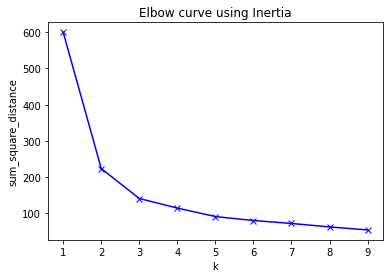

In [11]:
# lets plot the elbow curve
plt.plot(K,sum_square_distance,"-bx")
plt.xlabel('k')
plt.ylabel('sum_square_distance')
plt.title("Elbow curve using Inertia")
plt.show()

# As we can see here the graph after 3 is kinda straight so from that we can get our Elbow point which is 3.

We find the number of optimal Clusters that is 3

In [19]:
# Now drawing the scatter plot
kmean=KMeans(n_clusters=3)
prediction=kmean.fit_predict(X)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

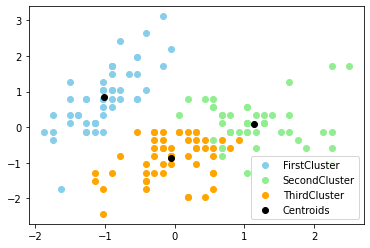

In [42]:
# Lets draw the scatterd plot with our labeled data to visualize the clusters
# and also draw the centroids
filtered_label1=X[prediction==0]
filtered_label2=X[prediction==1]
filtered_label3=X[prediction==2]
plt.scatter(filtered_label1[:,0],filtered_label1[:,1],color='skyblue',label="FirstCluster")
plt.scatter(filtered_label2[:,0],filtered_label2[:,1],color='lightgreen',label="SecondCluster")
plt.scatter(filtered_label3[:,0],filtered_label3[:,1],color='orange',label="ThirdCluster")
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],color="black",label="Centroids")
plt.legend()
plt.show()

Here we can visualize the clusters along with their Centroids

# Task 2 Successfully completed :)